In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [21]:
tickers = ['PG', 'MSFT', 'F', 'GE']
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [22]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5595 entries, 1995-01-03 to 2017-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5595 non-null   float64
 1   MSFT    5595 non-null   float64
 2   F       5595 non-null   float64
 3   GE      5595 non-null   float64
dtypes: float64(4)
memory usage: 218.6 KB


In [23]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.529935,2.323633,3.674592,17.009945
1995-01-04,7.469576,2.340524,3.773459,17.009945
1995-01-05,7.363944,2.301917,3.740505,17.051640
1995-01-06,7.379036,2.340524,3.740505,16.968269
1995-01-09,7.348848,2.326047,3.806418,16.801497


In [24]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-03-16,75.101334,59.161118,8.818934,129.921768
2017-03-17,74.739967,59.371609,8.666163,130.489517
2017-03-20,74.920647,59.426529,8.527286,129.878082
2017-03-21,74.896019,58.767555,8.138418,128.349594
2017-03-22,74.731750,59.518055,8.173138,128.960999


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [25]:
mydata.iloc[0]

PG       7.529935
MSFT     2.323633
F        3.674592
GE      17.009945
Name: 1995-01-03 00:00:00, dtype: float64

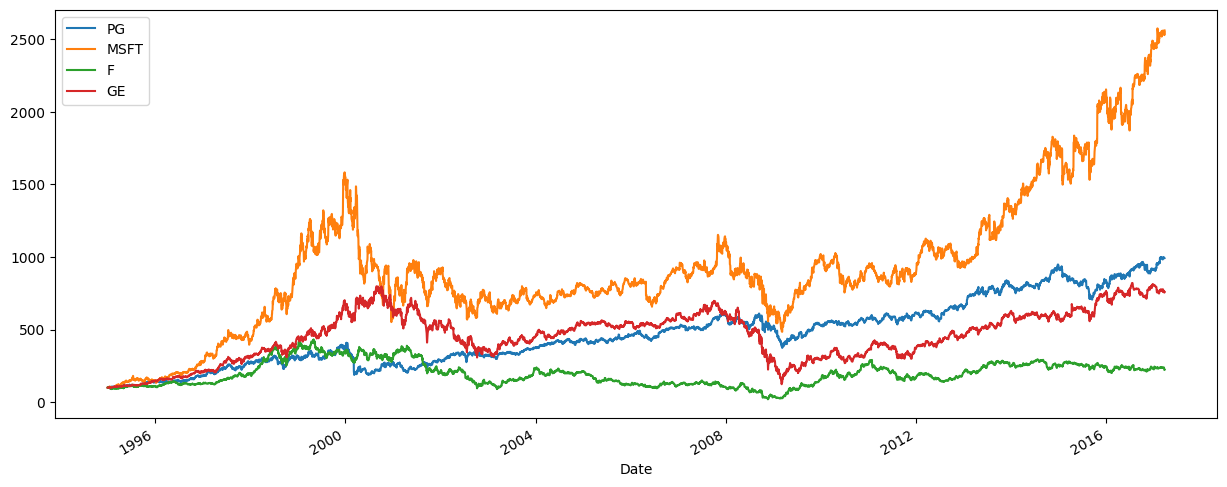

In [26]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

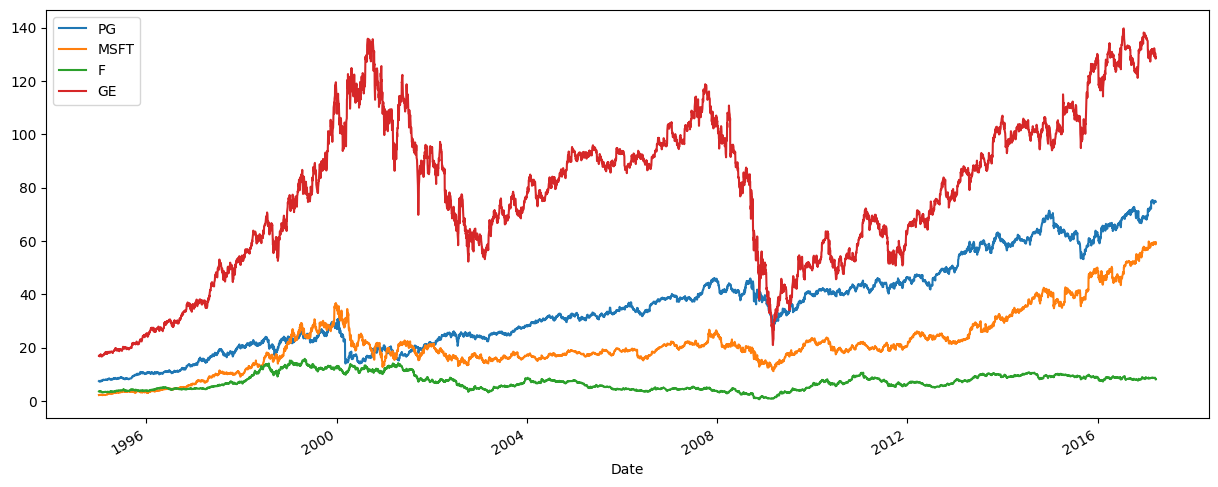

In [27]:
mydata.plot(figsize=(15,6))
plt.show()

In [28]:
mydata.loc['1995-1-03']

PG       7.529935
MSFT     2.323633
F        3.674592
GE      17.009945
Name: 1995-01-03 00:00:00, dtype: float64

In [29]:
mydata.iloc[0]

PG       7.529935
MSFT     2.323633
F        3.674592
GE      17.009945
Name: 1995-01-03 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [30]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004889
1995-01-09,-0.004091,-0.006185,0.017621,-0.009829


In [40]:
annual_returns = returns.mean()*250
annual_returns

PG      0.128590
MSFT    0.196030
F       0.117966
GE      0.133520
dtype: float64

In [39]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
print(weights)

[0.25 0.25 0.25 0.25]


In [35]:
np.dot(annual_returns, weights)

0.1440264623520146

In [36]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%'
print(pfolio_1)

14.402999999999999%


In [37]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [38]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)

14.402999999999999%
15.421999999999999%
